In [75]:
from langgraph.graph import START, END, StateGraph
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_openai import OpenAIEmbeddings
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from CONFIG import GROQ_MODEL, OPENAI_EMBEDDED_MODEL
from langchain_community.vectorstores import FAISS
from typing import TypedDict, List
from langchain_core.prompts import ChatPromptTemplate

In [76]:
load_dotenv()

False

In [77]:
# MODEL loaded

embedded_model = OpenAIEmbeddings(model=OPENAI_EMBEDDED_MODEL)
llm = ChatGroq(model=GROQ_MODEL)

In [78]:
# PDF loading

pdf = PyPDFLoader(file_path='A:\AI_Projects_Practice\CRAG\The_Evolution_of_AI_in_Dubai.pdf')
pdf_loaded = pdf.load()
print(f"PDF has {len(pdf_loaded)} pages")

PDF has 8 pages


In [79]:
# Chunking

chunks = RecursiveCharacterTextSplitter(chunk_size=900, chunk_overlap=100).split_documents(pdf_loaded)
print(f"Total chunks are {len(chunks)}")

Total chunks are 24


In [80]:
# Stored in vector database (FAISS)

vectore_storage = FAISS.from_documents(chunks, embedded_model)

In [94]:
# Retrieved based on similarity (k=2)

retriever = vectore_storage.as_retriever(serach_type='similarity', serach_kwargs={'k': 2})
for i in retriever.invoke('what about dubai'):
    print(i.page_content)
    print()
    print('*'*100)
    print()

Dubai AI Strategy: Introduced in 2017, this strategy aims to make Dubai a global hub for AI by
2031. It focuses on utilizing AI to optimize government operations, improve city services, and
advance economic development. It involves collaboration between governmental bodies and
private sectors to create an ecosystem that fosters AI innovation.
Smart Dubai: Under this initiative, the city aims to leverage AI technologies to provide better
public services. Key projects include AI-powered chatbots for government services, such as the
Dubai Corporation for Ambulance Services, which utilizes AI to optimize response times and
allocate resources more effectively based on real-time data.
Dubai AI Ethics Advisory Board: To ensure that the deployment of AI technologies is ethical
and transparent, this board was formed. It reviews AI projects for compliance with ethical

****************************************************************************************************

finance, and transportatio

In [95]:
class state(TypedDict):
    question: str
    answer: str
    doc: List[str]

In [ ]:
def retrieved_str(state: state) -> str:
    q = state['question']
    return {'doc': retriever.invoke(q)}

In [98]:
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Answer only from the context. If not in context, say you don't know."),
        ("human", "Question: {question}\n\nContext:\n{context}"),
    ]
)

def generate(state):
    context = "\n\n".join(d.page_content for d in state["doc"])
    out = (prompt | llm).invoke({"question": state["question"], "context": context})
    return {"answer": out.content}

In [99]:
graph = StateGraph(state)

graph.add_node('retrieved_str', retrieved_str)
graph.add_node('generate', generate)

graph.add_edge(START, 'retrieved_str')
graph.add_edge('retrieved_str', 'generate')
graph.add_edge('generate', END)

rag = graph.compile()

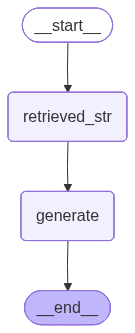

In [100]:
rag

In [101]:
res = rag.invoke(
    {
        'question': 'tell me Strategy of AI in Dubai',
	  'doc': [],
	  'answer': ''
    }
)

AttributeError: 'list' object has no attribute 'page_content'

In [88]:
res['answer']

"It seems you haven't provided a question related to the context. Please provide the question you'd like me to answer based on the given context. I'll respond accordingly."

In [89]:
print(res['doc'])

[]
